In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [59]:
books = pd.read_csv("books.csv", header=0, error_bad_lines=False)
print(books.shape)

(11127, 13)


In [60]:
print(books.head())

   bookID  ... Unnamed: 12
0       1  ...         NaN
1       2  ...         NaN
2       4  ...         NaN
3       5  ...         NaN
4       8  ...         NaN

[5 rows x 13 columns]


In [61]:
print(list(books.columns))

['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher', 'Unnamed: 12']


In [62]:
books = books[['average_rating','num_pages','ratings_count','text_reviews_count']]

In [63]:
print(books)

      average_rating num_pages  ratings_count  text_reviews_count
0               4.57       652        2095690               27591
1               4.49       870        2153167               29221
2               4.42       352           6333                 244
3               4.56       435        2339585               36325
4               4.78      2690          41428                 164
...              ...       ...            ...                 ...
11122           4.06       512            156                  20
11123           4.08       635            783                  56
11124           3.96       415            820                  95
11125           3.72       434            769                 139
11126           3.91       272            113                  12

[11127 rows x 4 columns]


In [64]:
books.dtypes

average_rating        object
num_pages             object
ratings_count          int64
text_reviews_count     int64
dtype: object

In [74]:
books[books['average_rating'].apply(lambda x: isinstance(x, (int, np.int64)))]

,average_rating,num_pages,ratings_count,text_reviews_count


In [75]:
books.dtypes

average_rating        object
num_pages             object
ratings_count          int64
text_reviews_count     int64
dtype: object

In [76]:
X = books[['ratings_count','text_reviews_count']]
y = books['average_rating']

In [77]:
print(X)

       ratings_count  text_reviews_count
0            2095690               27591
1            2153167               29221
2               6333                 244
3            2339585               36325
4              41428                 164
...              ...                 ...
11122            156                  20
11123            783                  56
11124            820                  95
11125            769                 139
11126            113                  12

[11127 rows x 2 columns]


In [78]:
print(y)

0        4.57
1        4.49
2        4.42
3        4.56
4        4.78
         ... 
11122    4.06
11123    4.08
11124    3.96
11125    3.72
11126    3.91
Name: average_rating, Length: 11127, dtype: object


In [79]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [80]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


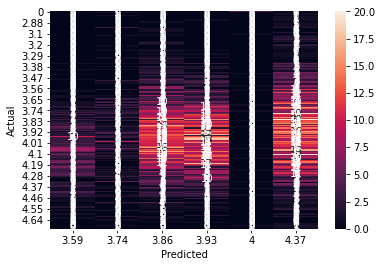

In [81]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [82]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.008986340762041696
